In [1]:
import pandas as pd
from RoutePlanner.CellGrid import CellGrid
from RoutePlanner.IO import LoadIcePoints, LoadCurrentPoints
from RoutePlanner.Optimisation import TravelTime
from RoutePlanner.Plot import InteractiveMap, PlotMesh, PlotPaths

In [2]:
OptInfo = {}
X     = [230,360]
Y     = [-80,-40]
d     = [5,2.5]
OptInfo['Start Time']           = '2017-02-22'
OptInfo['End Time']             = '2017-03-22'
OptInfo['WayPoints']            = '../../resources/WayPoints.csv'
OptInfo['MaxIceExtent']         = 0.8
OptInfo['Zero Currents']        = False
OptInfo['VariableSpeed']        = True
OptInfo['Time Unit']            = 'days'
OptInfo['VehicleInfo']          = {}
OptInfo['VehicleInfo']['Speed'] = 26.3
OptInfo['VehicleInfo']['Unit']  = 'km/hr'

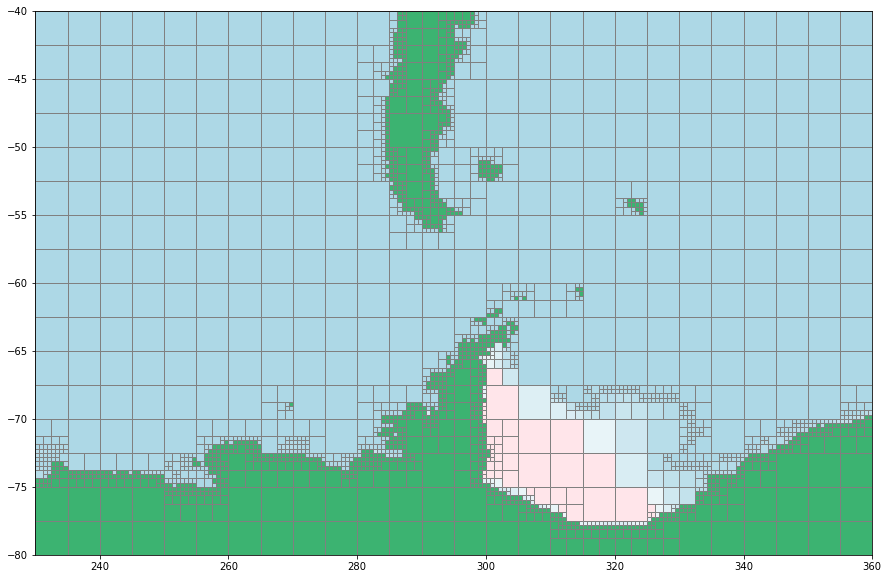

In [3]:
icePoints     = LoadIcePoints('../../Data/bsose_i122_2013to2017_1day_SeaIceArea.nc',OptInfo['Start Time'],OptInfo['End Time'])
currentPoints = LoadCurrentPoints('../../Data/SOSE_surface_velocity_6yearMean_2005-2010.nc')

cellGrid = CellGrid(X[0],X[1],Y[0],Y[1],d[0],d[1])
cellGrid.addIcePoints(icePoints)
cellGrid.addCurrentPoints(currentPoints)
cellGrid.recursiveSplit(3)
PlotMesh(cellGrid)

=== Processing Waypoint = MargueriteBay ===


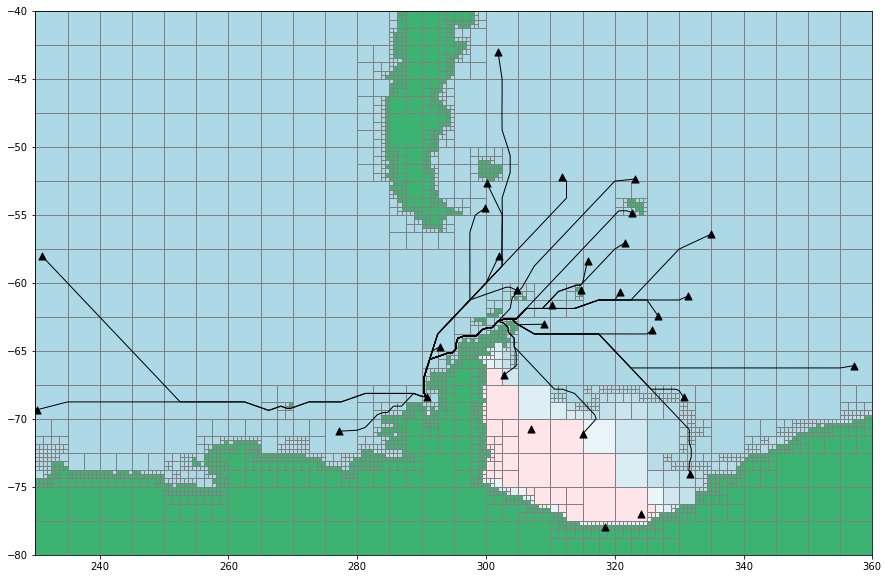

In [4]:
TT = TravelTime(cellGrid,OptInfo)
Paths = TT.Paths(source_waypoints=['MargueriteBay'],verbrose=True)#,end_waypoints=['Brunt'])
PlotPaths(cellGrid,Paths,routepoints=False,Waypoints=TT.OptInfo['WayPoints'])

In [27]:
m = InteractiveMap(cellGrid,Paths,pd.read_csv('../../resources/WayPoints.csv'),SitesOfInterest=pd.read_csv('../../resources/BAS_Stations.csv'),SDA='/Users/jsmith/Documents/Research/Researcher_BAS/RoutePlanning/SDADT-Positions')
m.save('NonSmoothing_Feb2022.html'); m

In [8]:
SmoothedPaths = TT.PathSmoothing(Paths,maxiter=1000, minimumDiff=0.0001)

 PATH: MargueriteBay -> Falklands 
12 iterations to convergence
 PATH: MargueriteBay -> SouthGeorgia 
37 iterations to convergence
 PATH: MargueriteBay -> SouthSandwichTrench 
43 iterations to convergence
 PATH: MargueriteBay -> NorthPeninsula 
25 iterations to convergence
 PATH: MargueriteBay -> MaudRise 
23 iterations to convergence
 PATH: MargueriteBay -> AmundsenSea 
Maximum number of iterations met !
1000 iterations to convergence
 PATH: MargueriteBay -> CentralWeddellSea 
34 iterations to convergence
 PATH: MargueriteBay -> CentralScotiaSea 
17 iterations to convergence
 PATH: MargueriteBay -> ArgentineSea 
Maximum number of iterations met !
1000 iterations to convergence
 PATH: MargueriteBay -> BellingshausenSea 
21 iterations to convergence
 PATH: MargueriteBay -> Palmer 
24 iterations to convergence
 PATH: MargueriteBay -> Brunt 
58 iterations to convergence
 PATH: MargueriteBay -> NorthernWeddellSea 
24 iterations to convergence
 PATH: MargueriteBay -> NorthWestGeorgiaRise 
1

In [26]:
WayPoints = pd.read_csv('../../resources/WayPoints.csv')
sm = InteractiveMap(cellGrid,SmoothedPaths,WayPoints,PathPoints=False,SitesOfInterest=pd.read_csv('../../resources/BAS_Stations.csv'),SDA='/Users/jsmith/Documents/Research/Researcher_BAS/RoutePlanning/SDADT-Positions')
sm.save('Smoothing_Feb2022.html'); sm